# Exploratoy Data Analysis...
- Understand the Problem Statement
- Univariate Analysis (Single Variable)
- Bivariate/Multivariate Analysis (Two or More Variable)
- Missing Values
- Outlier Analysis
- Feature Engineering
- Data PreProcessing Step - Scaling and Transformation

Predicting delivery time for the order Problem Statement

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

### **Data Dictionary**

- market_id : integer id for the market where the restaurant lies

- created_at : the timestamp at which the order was placed

- actual_delivery_time : the timestamp when the order was delivered

- store_primary_category: category for the restaurant

- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant,     prebooked, third part etc)

- total_items : no. of items

- subtotal : final price of the order

- num_distinct_items : the number of distinct items in the order

- min_item_price : price of the cheapest item in the order

- max_item_price : price of the costliest item in order

- total_onshift_dashers : number of delivery partners on duty at the time order was placed

- total_busy_dashers : number of delivery partners attending to other tasks

- total_outstanding_orders : total number of orders to be fulfilled at the moment

- estimated_store_to_consumer_driving_duration : approximate travel time from restaurant to customer


In [1]:
# Treatment and manipulation of data
#==============================================================
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

# Data visualization
#=============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Warnings
#============================================================
import warnings
warnings.filterwarnings("ignore")


# Preprocessing
#==============================================================
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Models
#==============================================================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
# warnings...
import warnings
warnings.filterwarnings("ignore")

# dataframe view..
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.stats import stats
from scipy.stats import f_oneway, kruskal, mannwhitneyu, shapiro


In [2]:
data=pd.read_csv("porter_data.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [3]:
# We check the number of null values
total_null_values = data.isnull().sum().to_frame().sort_values(0,ascending=False).rename(columns={0:'Total_null_values'})
total_null_values['%'] = (total_null_values["Total_null_values"]/len(data))*100
total_null_values

,Total_null_values,%
market_id,0,0.0
created_at,0,0.0
actual_delivery_time,0,0.0
store_primary_category,0,0.0
order_protocol,0,0.0
total_items,0,0.0
subtotal,0,0.0
num_distinct_items,0,0.0
min_item_price,0,0.0
max_item_price,0,0.0


In [4]:
# we do not have Missing Values 

In [5]:
#unique values in each column
dict_={}
for feature in data.columns:
    dict_[feature]=((data[feature].value_counts().shape[0]))
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
market_id,6
created_at,162649
actual_delivery_time,160344
store_primary_category,73
order_protocol,7
total_items,54
subtotal,8182
num_distinct_items,20
min_item_price,2251
max_item_price,2585


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [7]:
# Convert the following columns to category format:
# 'market_id', 'store_primary_category', 'order_protocol'

data["market_id"] = data["market_id"].astype("object")
data["store_primary_category"] = data["store_primary_category"].astype("object")
data["order_protocol"] = data["order_protocol"].astype("object")

In [8]:
# We convert the following columns to date format:
# 'created_at' y 'actual_delivery_time'

data["created_at"] = pd.to_datetime(data["created_at"],format="%Y-%m-%d %H:%M:%S")

data["actual_delivery_time"] = pd.to_datetime(data["actual_delivery_time"],format="%Y-%m-%d %H:%M:%S")

In [9]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


## Univariante Analysis

In [10]:
data_num= data.select_dtypes(np.number)

In [11]:
data_num.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

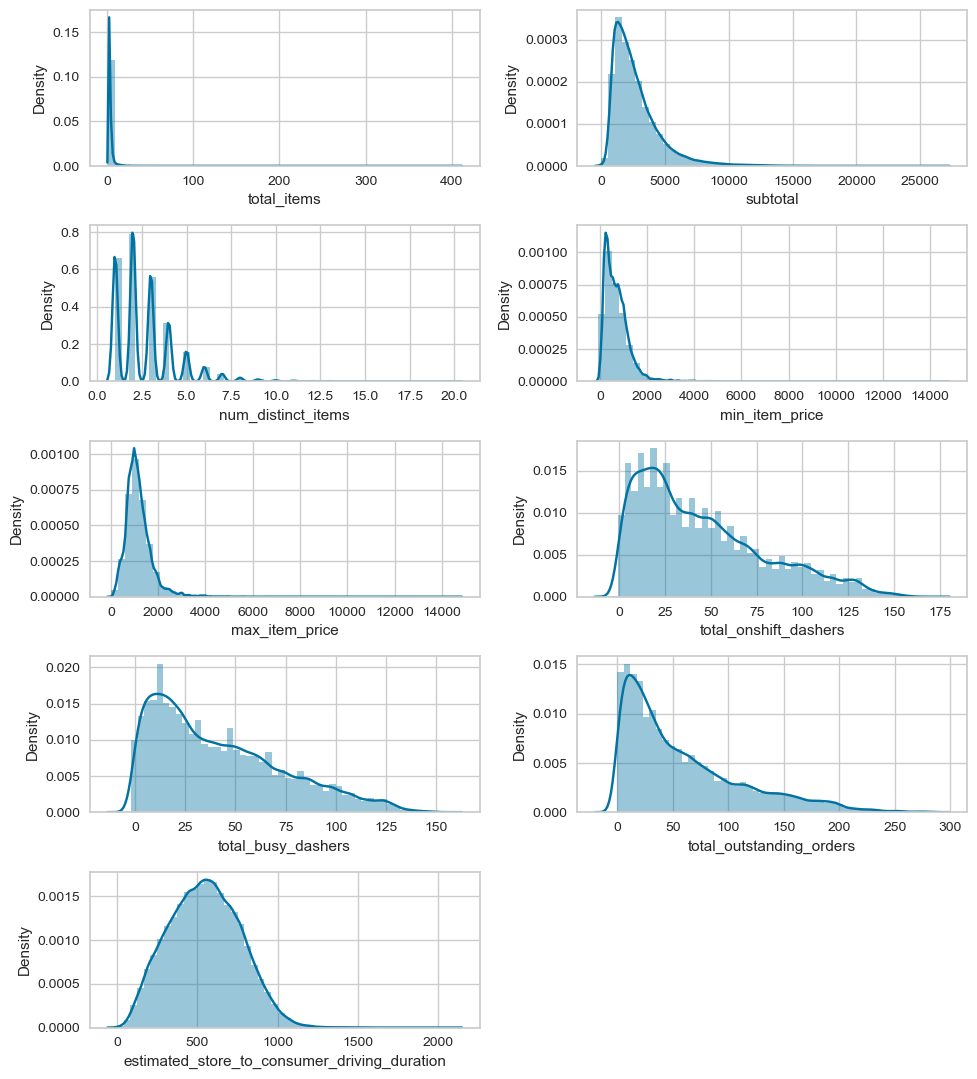

In [12]:
plt.figure(figsize=(10,17))
t=1
for i in data_num.columns:
    plt.subplot(8,2,t)
    sns.distplot(data[i])
    t=t+1
    
plt.tight_layout()
plt.show()
    

In [13]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [14]:
data["delivery_month"]  =data["created_at"].dt.month
data["created_year"]  =data["created_at"].dt.year


In [15]:
data['delivery_month']=data['delivery_month'].map({1:'jan',2:'feb',3:'oct'})

<AxesSubplot:xlabel='created_year', ylabel='count'>

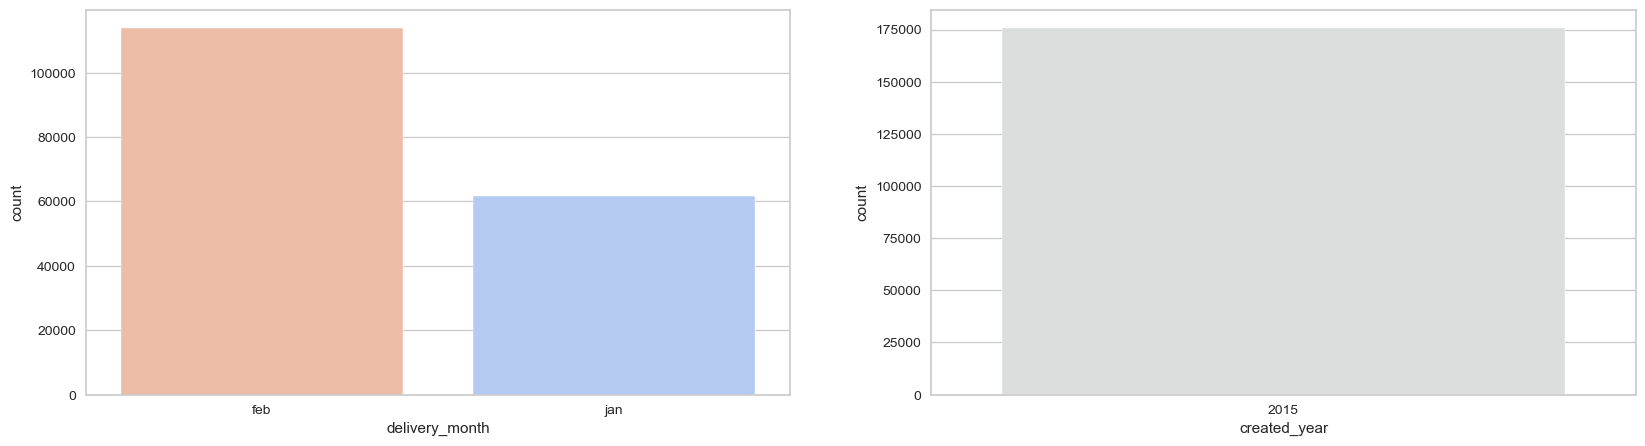

In [16]:
#Analysing what was the frequency of orders in each month and in year 2014 and 2015

fig=plt.figure(figsize=(20,5))
ax=[None for _ in range(2)]
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.set_style('darkgrid')
sns.countplot(x='delivery_month',data=data,palette='coolwarm_r',ax=ax[0])
sns.countplot(x='created_year',data=data,palette='coolwarm_r',ax=ax[1])

In [17]:
# most of the orders are in the month of Feb and all the orders are of year 2015 

In [18]:
cat_cols = data.select_dtypes(np.object)

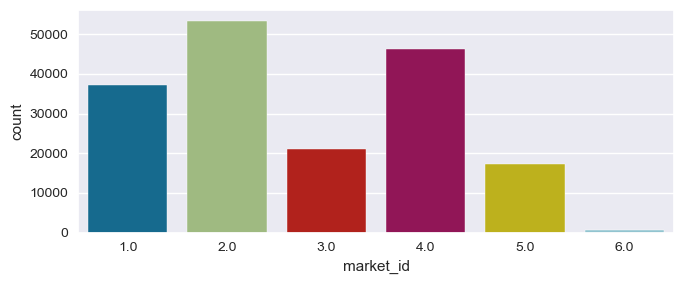

In [19]:
plt.figure(figsize=(7,3))
sns.countplot(data["market_id"])
plt.tight_layout()
plt.show()

<AxesSubplot:>

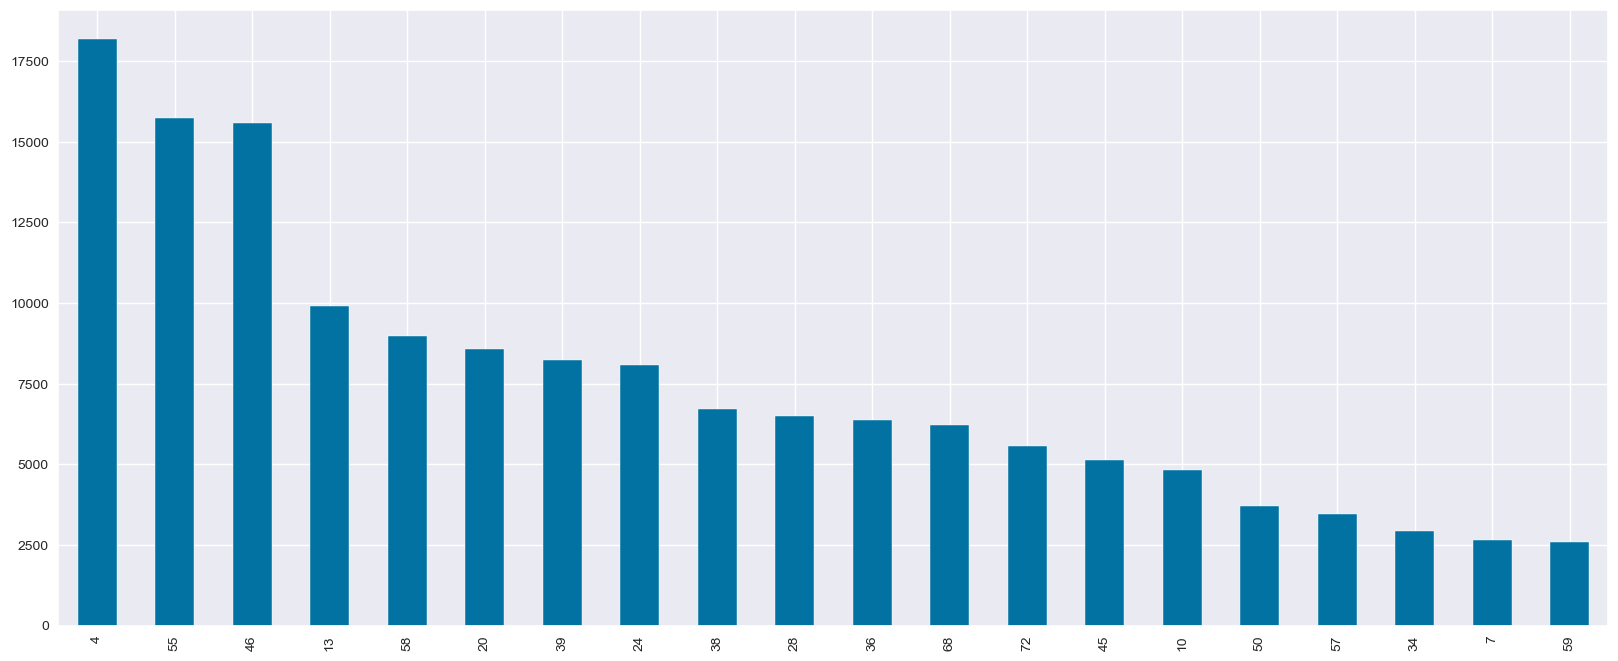

In [20]:
#top 20 i.e., most ordered category
fig=plt.figure(figsize=(20,8))
data['store_primary_category'].value_counts().sort_values(ascending=False)[:20].plot.bar()

In [21]:
# These are the top 20 food categories ordered most of the times 
# where we can say that american type of food categories has highest popularity

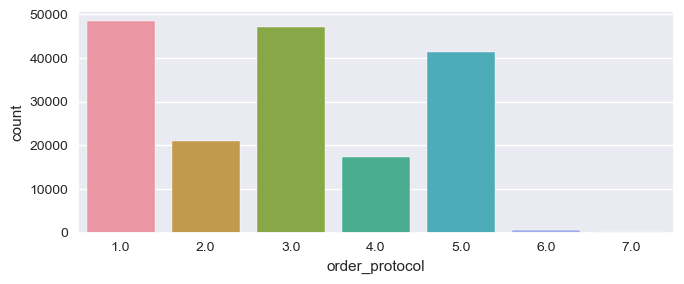

In [22]:
plt.figure(figsize=(7,3))
sns.countplot(data["order_protocol"])
plt.tight_layout()
plt.show()

# Bivariante Analysis

In [23]:
data['Target']=((data["actual_delivery_time"]-data["created_at"]).dt.total_seconds().astype('int64'))/60

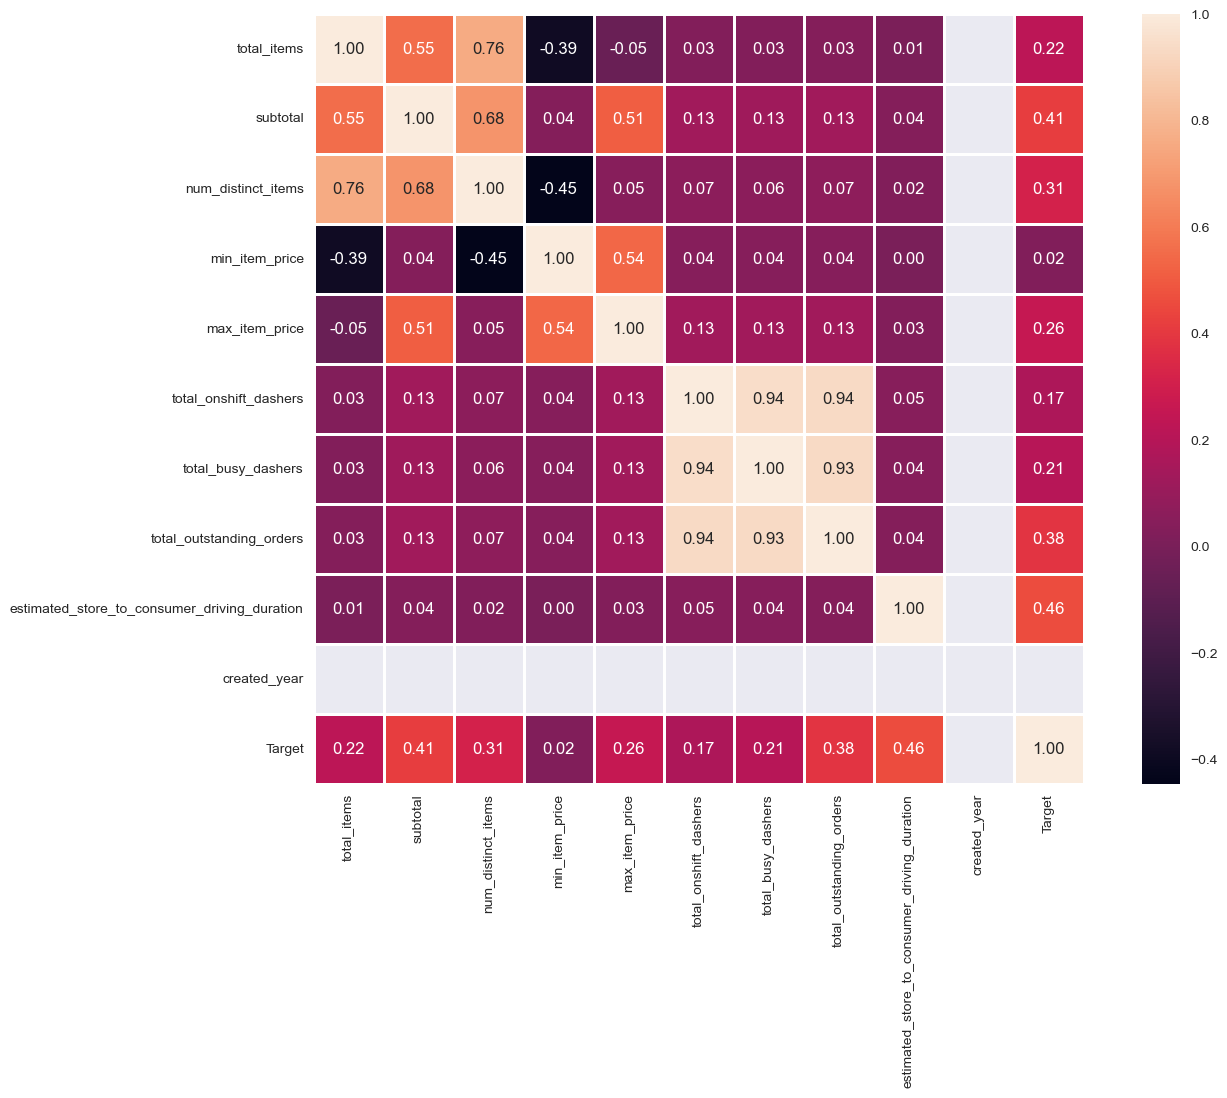

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),square=True, annot = True,linewidths=1,fmt = '.2f')
plt.show()

In [25]:
num_cols= data.select_dtypes(np.number)

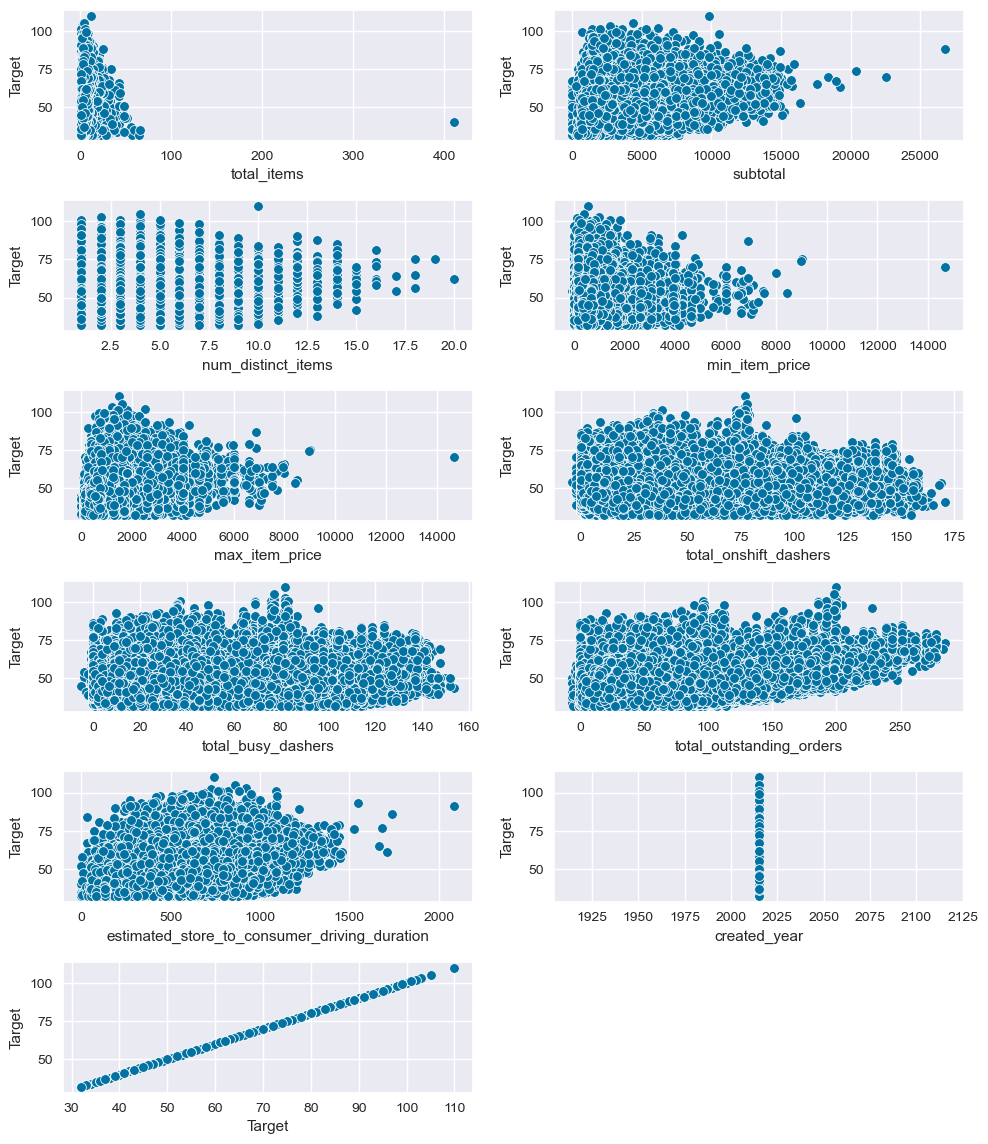

In [26]:
nrows = 8
ncols = 2
iterator = 1

plt.figure(figsize=(10, 15))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(data.loc[:, i], data["Target"])
    iterator+=1
    
plt.tight_layout()
plt.show()

In [27]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_month,created_year,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,feb,2015,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,feb,2015,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,feb,2015,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,feb,2015,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,jan,2015,46.0


### Outliers Treatment

In [28]:
data_1 = data.copy()

In [29]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  object        
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  object        
 4   order_protocol                                175777 non-null  object        
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

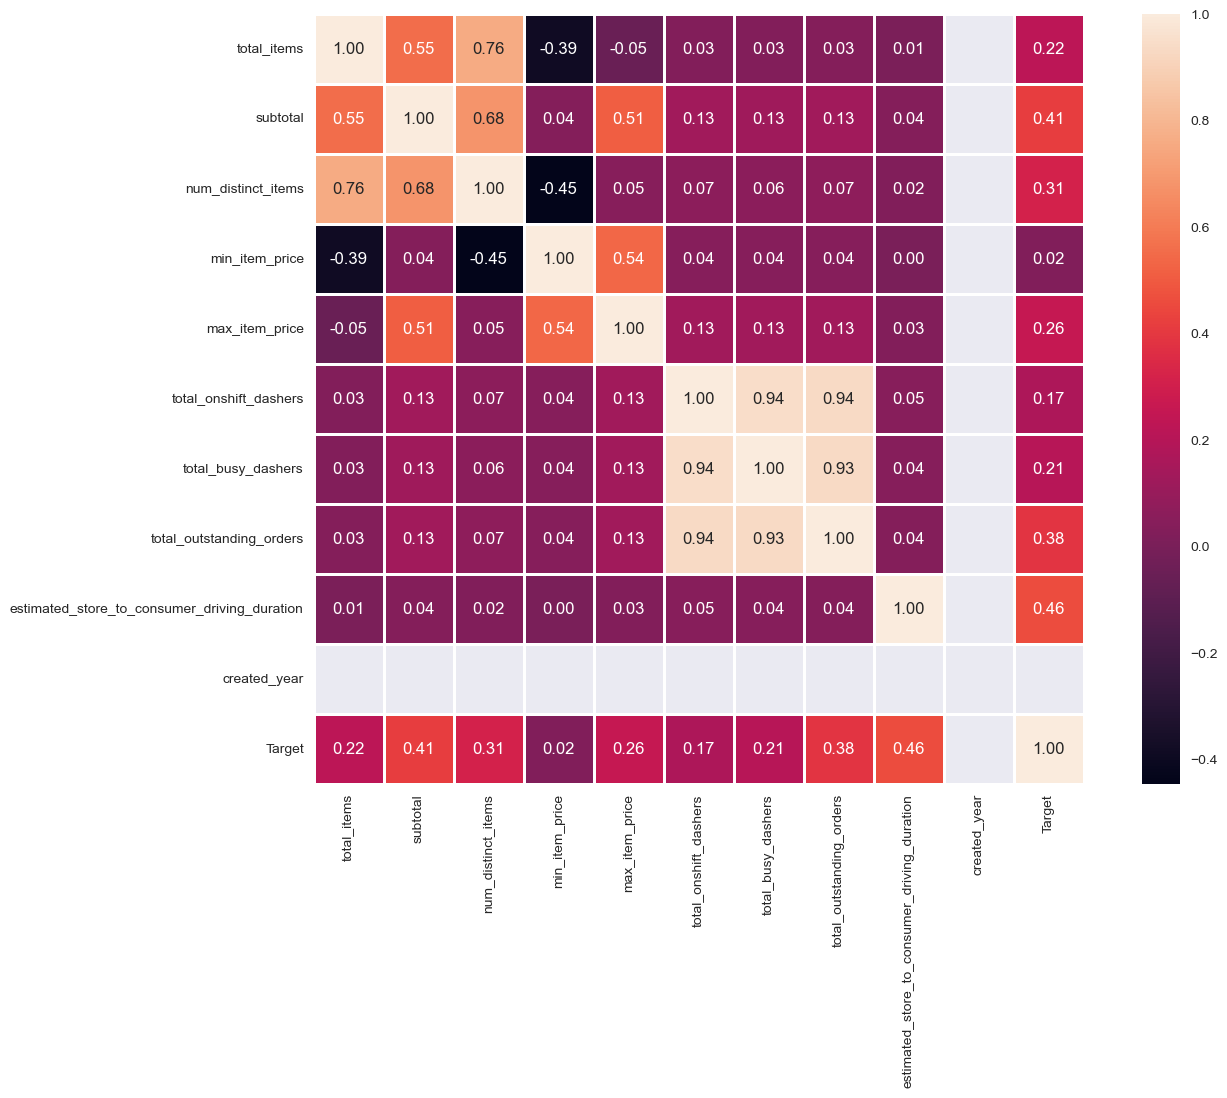

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data_1.corr(),square=True, annot = True,linewidths=1,fmt = '.2f')
plt.show()
# Correlation before removing Outliers 

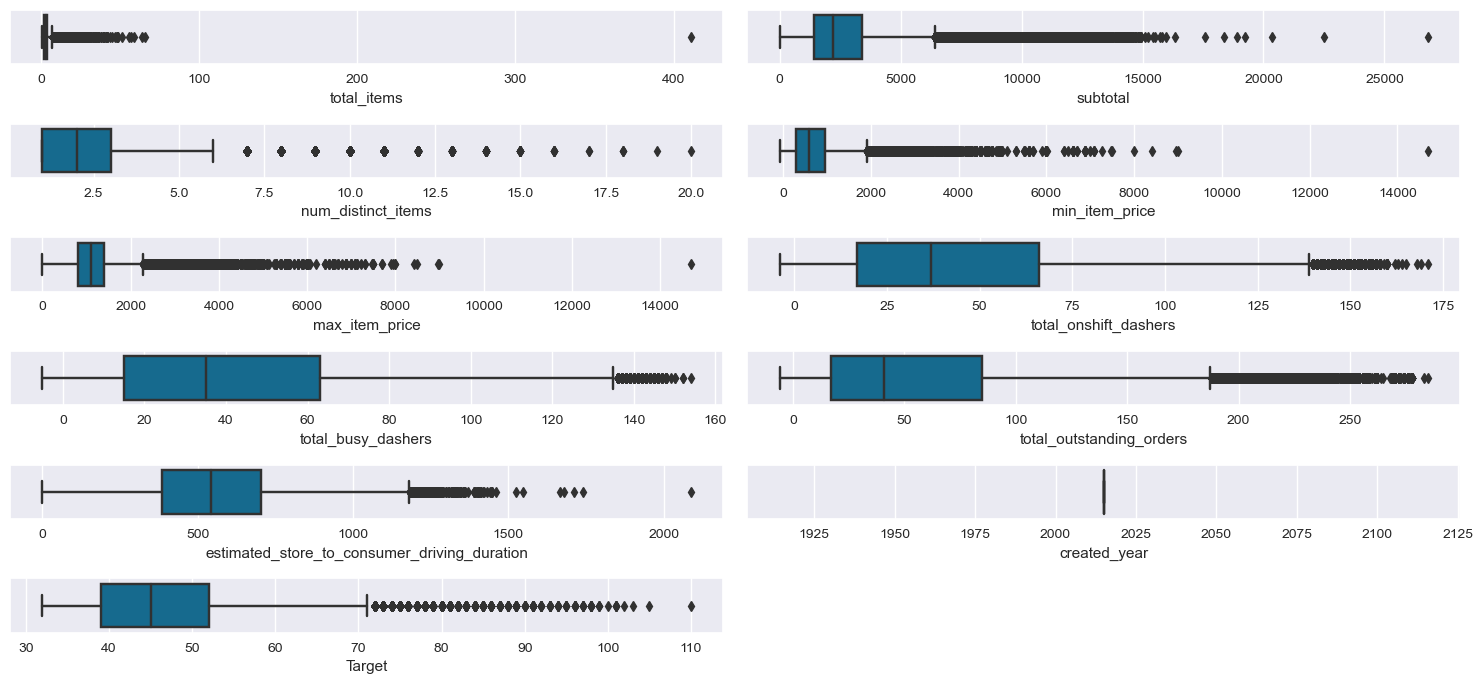

In [31]:
plt.figure(figsize=(15,10))
t = 1
for i in data_1.select_dtypes(np.number).columns:
    plt.subplot(9,2,t)
    sns.boxplot(data_1[i])
    t+=1
    
plt.tight_layout()
plt.show()
# we have outliers in out Data we will try to Treat usinng following ways which ever will give best result we will consider 
# that  approch 
# 1.5*IQR
# Zscore
# Cappinng 
# Manually

In [32]:
data.shape,data_1.shape

((175777, 17), (175777, 17))

In [33]:
# We are not gonna treat outliers through IQR method as it is removing more then 30,000 rows  and correlation still going 
# down so we will treat outliers through manually

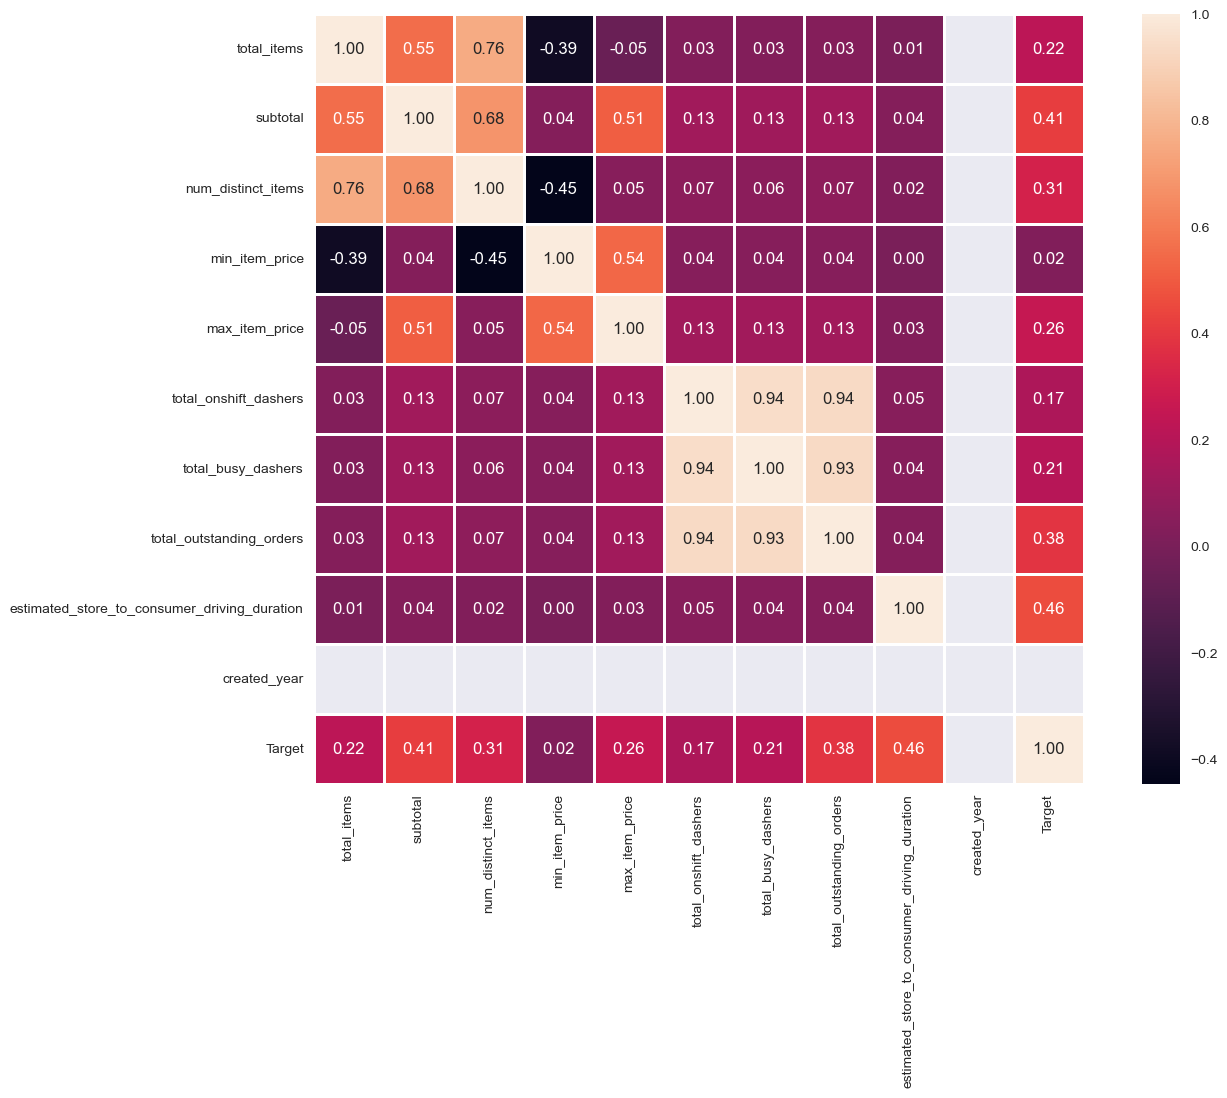

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(data_1.corr(),square=True, annot = True,linewidths=1,fmt = '.2f')
plt.show()

In [35]:
# Correlation Improves in some cases and correlation goes down in some cases 
# lets try anathoer method

In [36]:
data2 = data.copy()

In [37]:
data.shape, data2.shape

((175777, 17), (175777, 17))

In [38]:
# Zscore is removing all the rows so we will Try Winsorized Method

In [39]:
# It is Not showing That much good Result its looks

In [40]:
# Now we will treat outliers manually

In [41]:
data_new_1 = data.copy()

In [42]:
Q1 = data_new_1["Target"].quantile(0.25)
Q3 = data_new_1["Target"].quantile(0.75)

IQR = Q3 - Q1

lower_limit  = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

mask = (data["Target"]<lower_limit) | (data["Target"]>upper_limit)

data_new_1 = data[~(mask)]

data.shape

(175777, 17)

In [43]:
data_new_1.shape

(174028, 17)

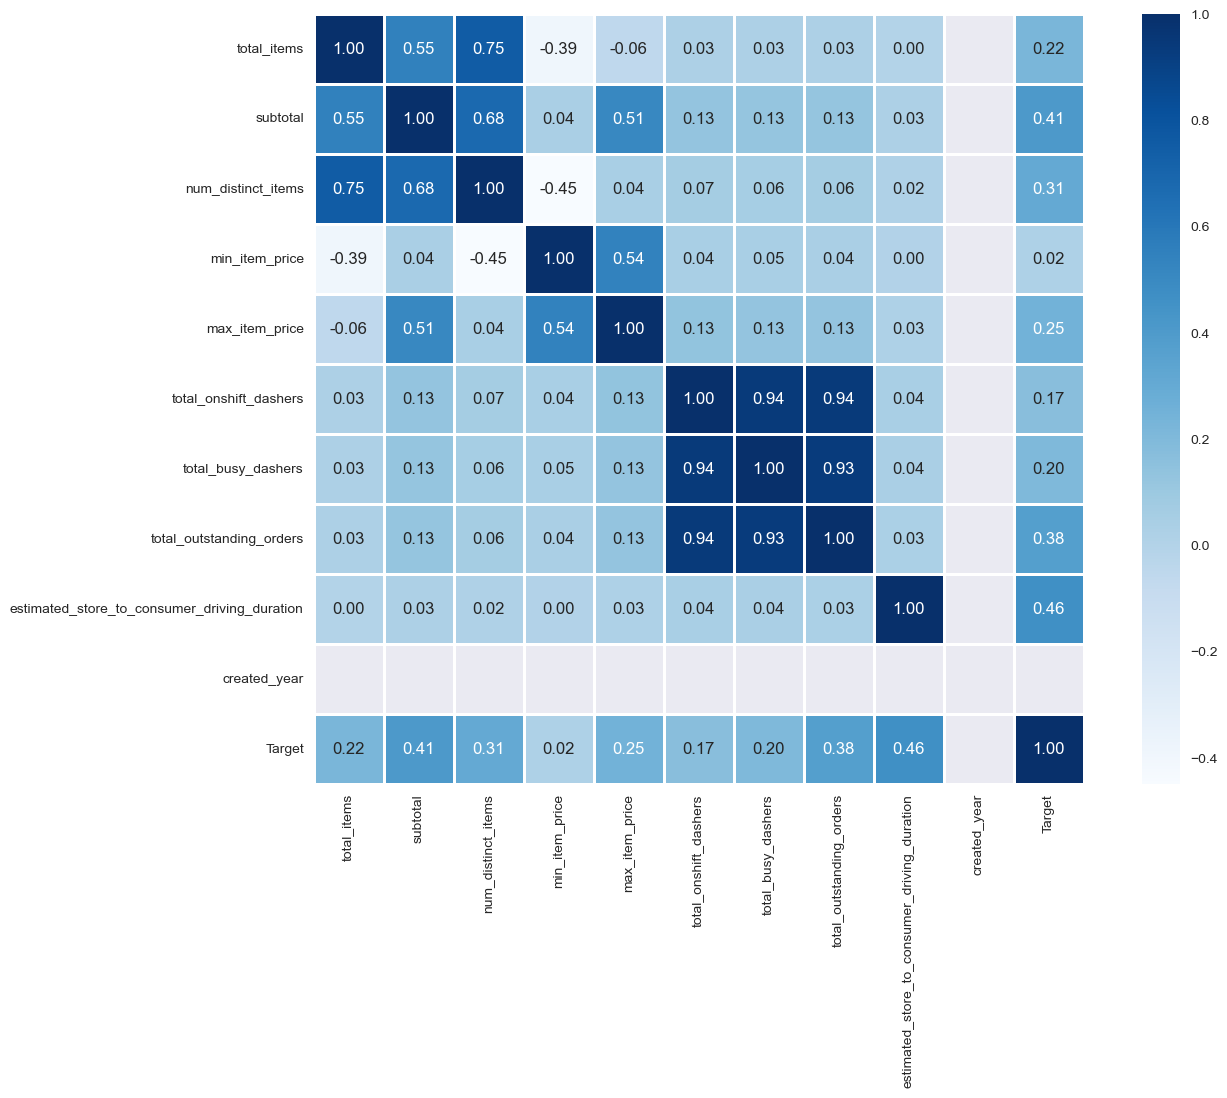

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data_new_1.corr(),square=True, annot = True,linewidths=1,fmt = '.2f',cmap='Blues')
plt.show()

<AxesSubplot:xlabel='total_items'>

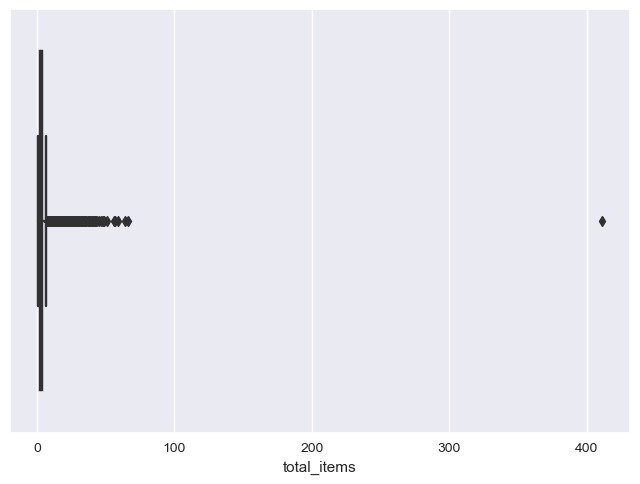

In [45]:
sns.boxplot(data_new_1['total_items'])

(171861, 17)


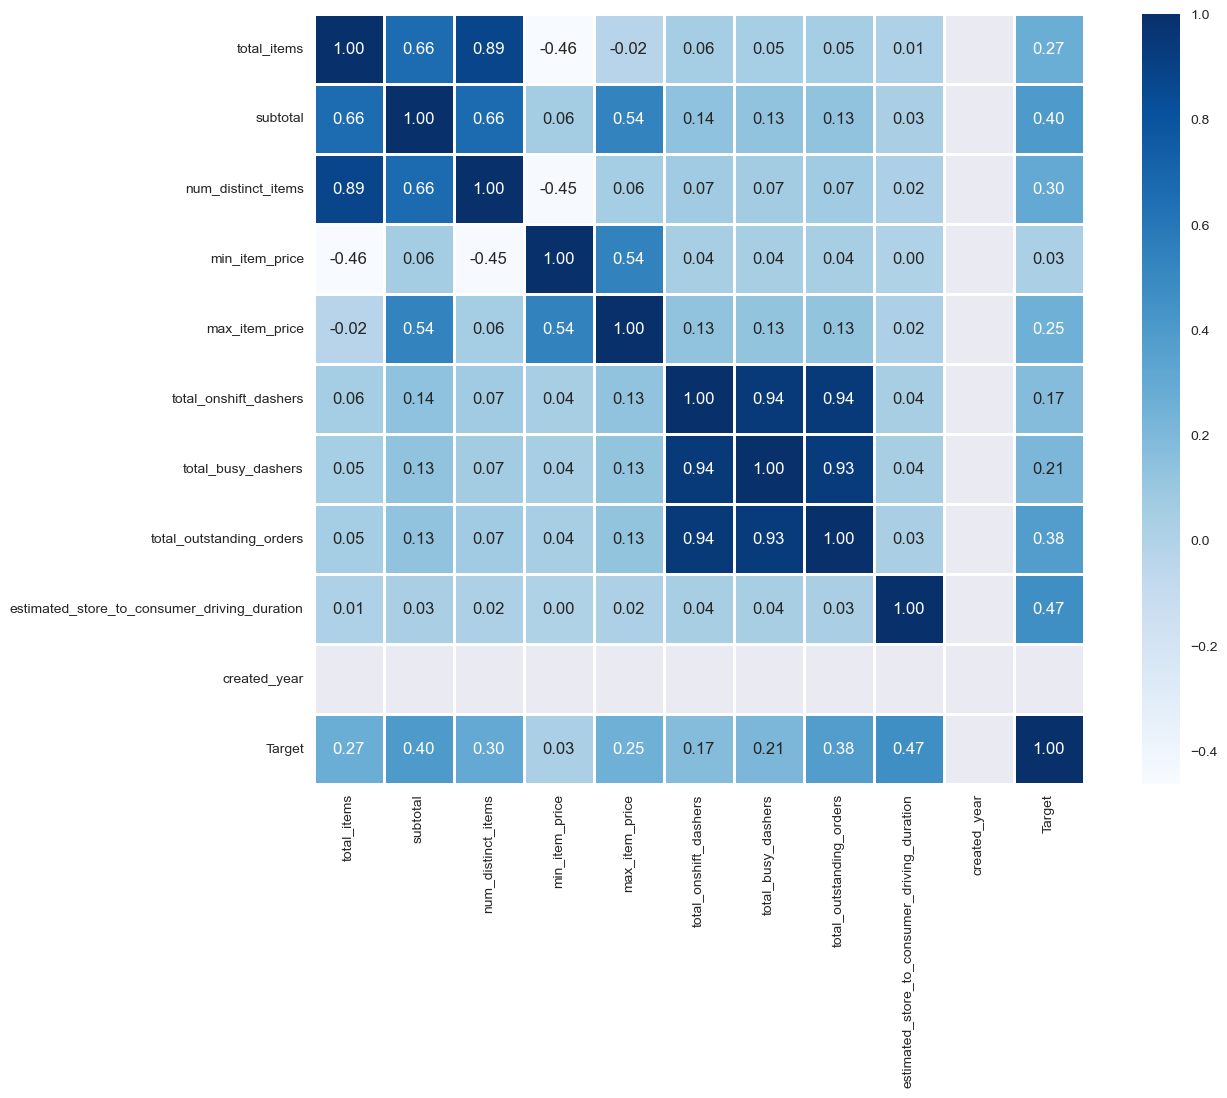

In [46]:
Q1 = data_new_1["total_items"].quantile(0.25)
Q3 = data_new_1["total_items"].quantile(0.75)

IQR = Q3 - Q1

lower_limit  = Q1 - (3.5*IQR)
upper_limit = Q3 + (3.5*IQR)

mask = (data_new_1["total_items"]<lower_limit) | (data["total_items"]>upper_limit)

data_new_1 = data_new_1[~(mask)]

# Above 11 , approx 2000 rows 

print(data_new_1.shape)

data_new_1[data_new_1['total_items']>11]



plt.figure(figsize=(15,10))
sns.heatmap(data_new_1.corr(),square=True, annot = True,linewidths=1,fmt = '.2f',cmap='Blues')
plt.show()

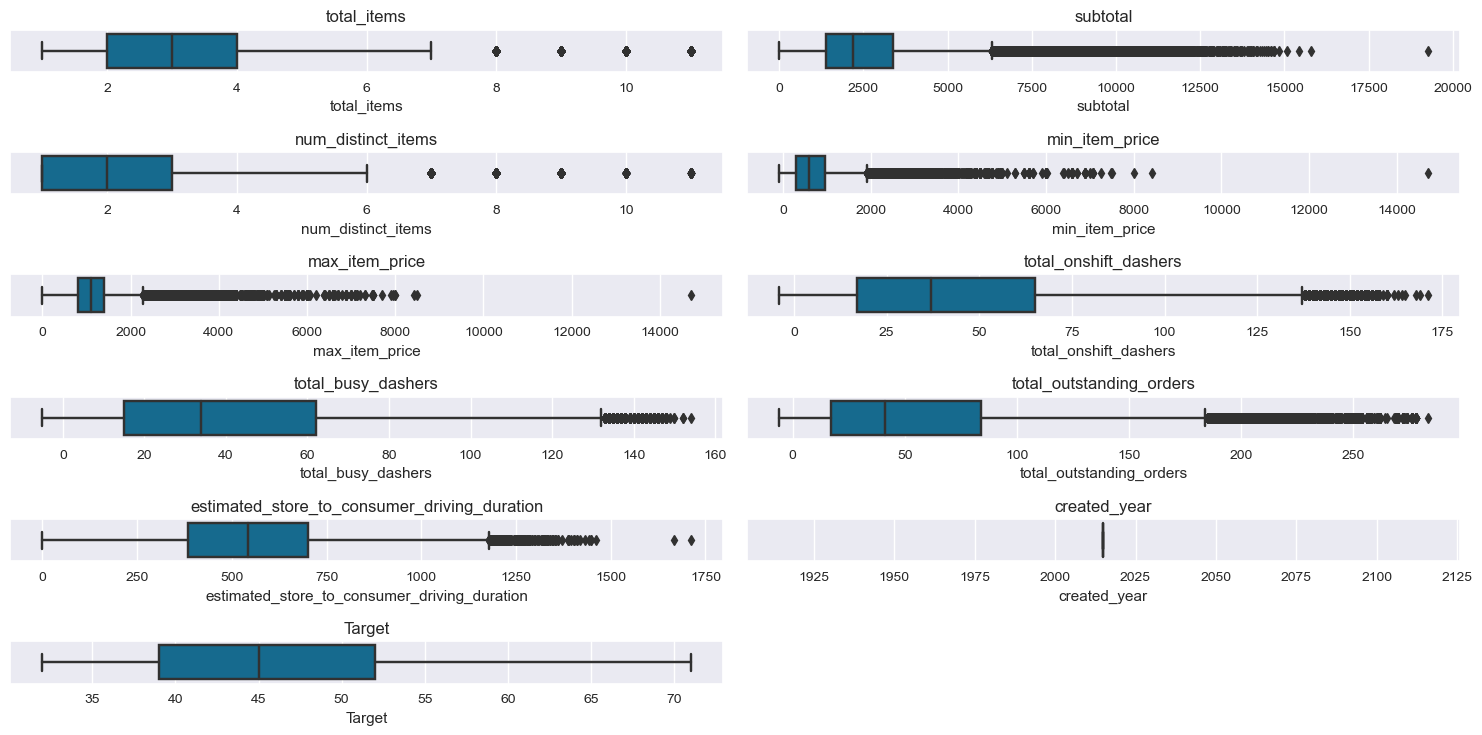

In [47]:
t=1
plt.figure(figsize=(15,12))
for i in num_cols:
    plt.subplot(10,2,t)
    plt.title(i)
    sns.boxplot(data_new_1[i])
    t+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='max_item_price'>

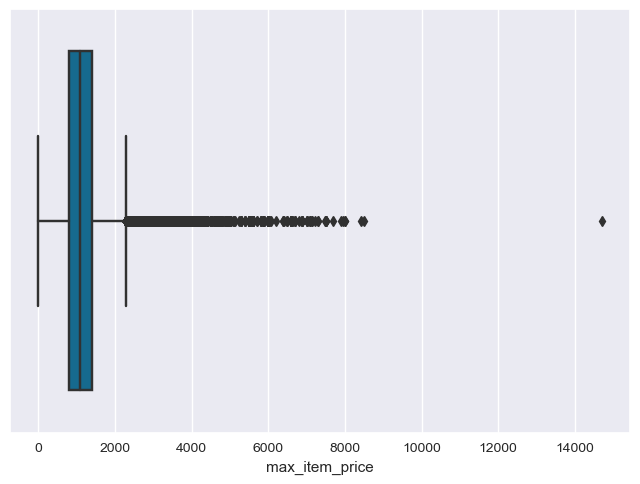

In [48]:
sns.boxplot(data_new_1['max_item_price'])

In [49]:
Q1 = data_new_1["max_item_price"].quantile(0.25)
Q3 = data_new_1["max_item_price"].quantile(0.75)

IQR = Q3 - Q1

lower_limit  = Q1 - (3.5*IQR)
upper_limit = Q3 + (3.5*IQR)



upper_limit

data_new_1[data_new_1['max_item_price']>3481]

# Removing 1116 rows 

mask = (data_new_1["max_item_price"]<lower_limit) | (data["max_item_price"]>upper_limit)

data_new_1 = data_new_1[~(mask)]

print(data_new_1.shape)

(170745, 17)


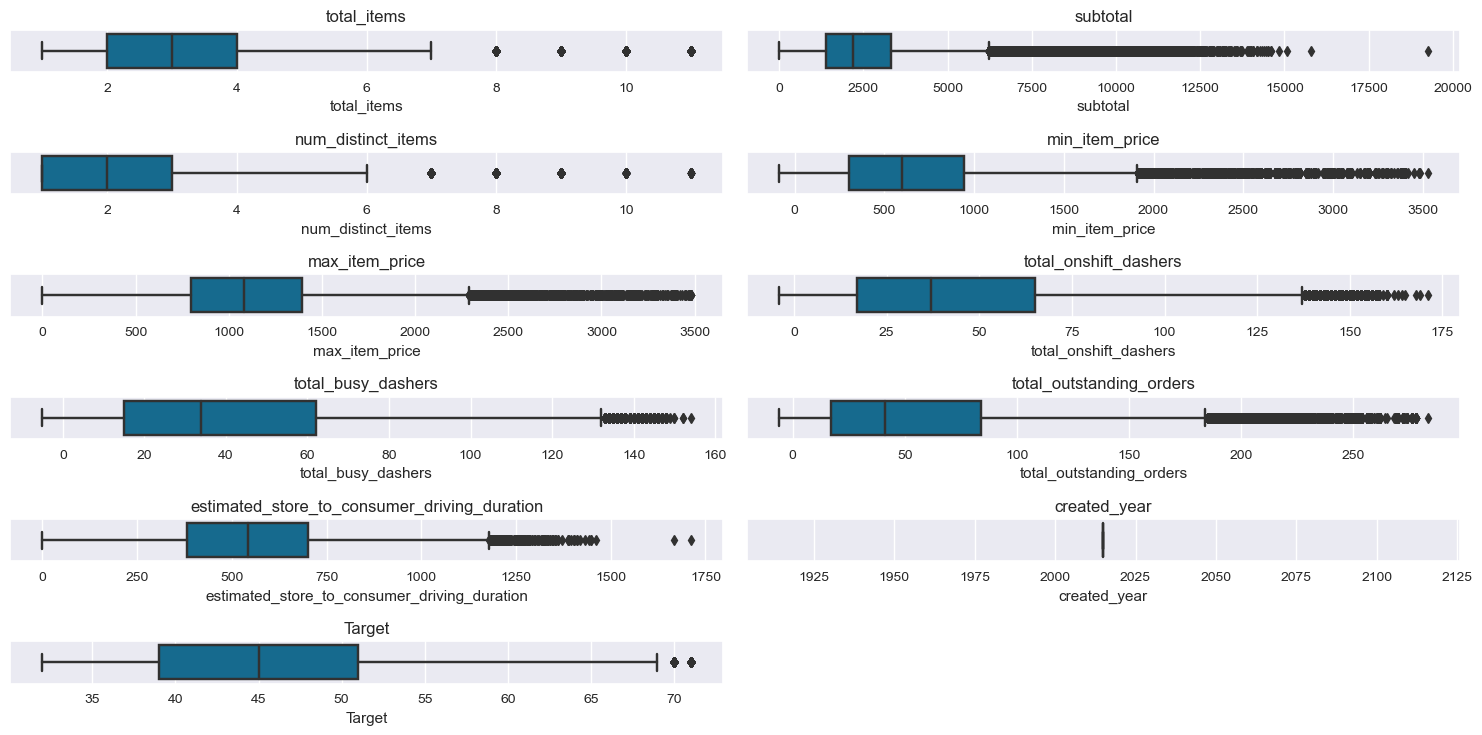

In [50]:
t=1
plt.figure(figsize=(15,12))
for i in num_cols:
    plt.subplot(10,2,t)
    plt.title(i)
    sns.boxplot(data_new_1[i])
    t+=1
plt.tight_layout()
plt.show()

In [51]:
# All the extreme outliers have been removed and we have lost almost 7k rows .

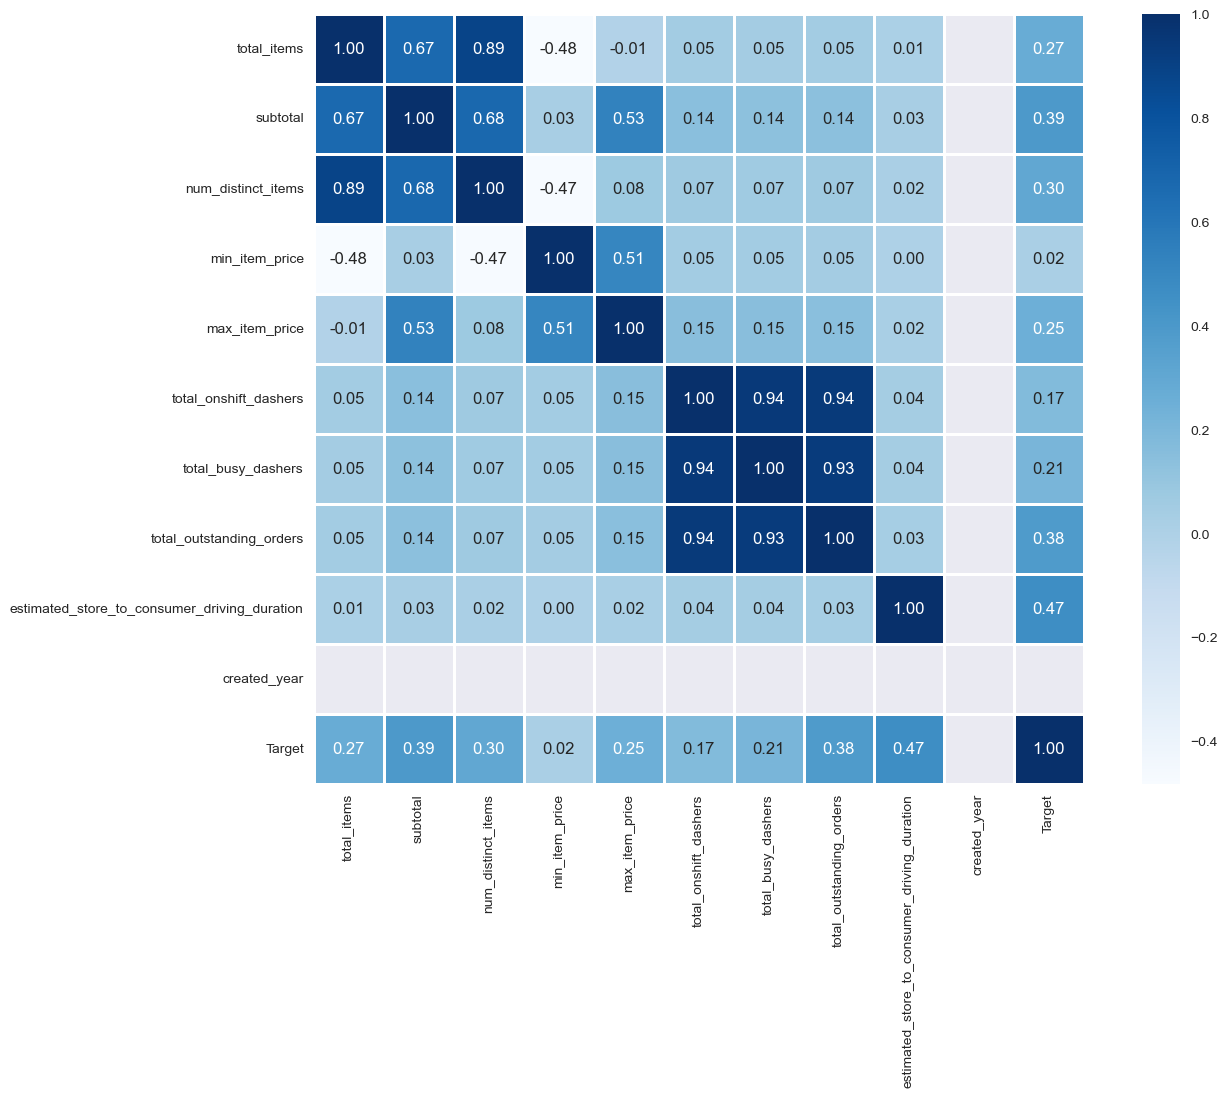

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data_new_1.corr(),square=True, annot = True,linewidths=1,fmt = '.2f',cmap='Blues')
plt.show()

In [53]:
data_2 = data_new_1.copy()

## Feature engineering

In [54]:
data_2.shape

(170745, 17)

In [55]:
data.head(2)

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_month,created_year,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,feb,2015,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,feb,2015,44.0


In [56]:
data_2.head(2)

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_month,created_year,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,feb,2015,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,feb,2015,44.0


In [57]:
data_2.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_month                                  0
created_year                                    0
Target                                          0
dtype: int64

In [58]:
data_2.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration', 'delivery_month',
       'created_year', 'Target'],
      dtype='object')

In [59]:
data_2['avg_order_value_category'] = round(data_2.groupby('store_primary_category')['subtotal'].transform('mean'),2)

In [60]:
data_2['hour']=data['created_at'].dt.hour
data_2['day']=data['created_at'].dt.dayofweek

data_2.drop(['created_at','actual_delivery_time',"delivery_month"],axis=1,inplace=True)



In [61]:
def peak_hours(x):
    if x in ([20,21,21,23,0,1,2,3,4,5]):
        return 1
    else:
        return 0
data_2['peak_hours'] = data_2['hour'].apply(peak_hours)
data_2['peak_hours'] = data_2['peak_hours'].astype('object')

In [62]:
data_2['total_available_partners'] = np.abs(data_2['total_onshift_dashers'] - data_2['total_busy_dashers'])

In [63]:
data_2.drop("created_year",axis=1,inplace = True)

In [64]:
data_2.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,Target,avg_order_value_category,hour,day,peak_hours,total_available_partners
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,2585.21,22,4,0,19.0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,2246.05,21,1,1,1.0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,2825.25,0,0,1,2.0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3692.71,3,3,1,1.0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,3692.71,2,1,1,0.0


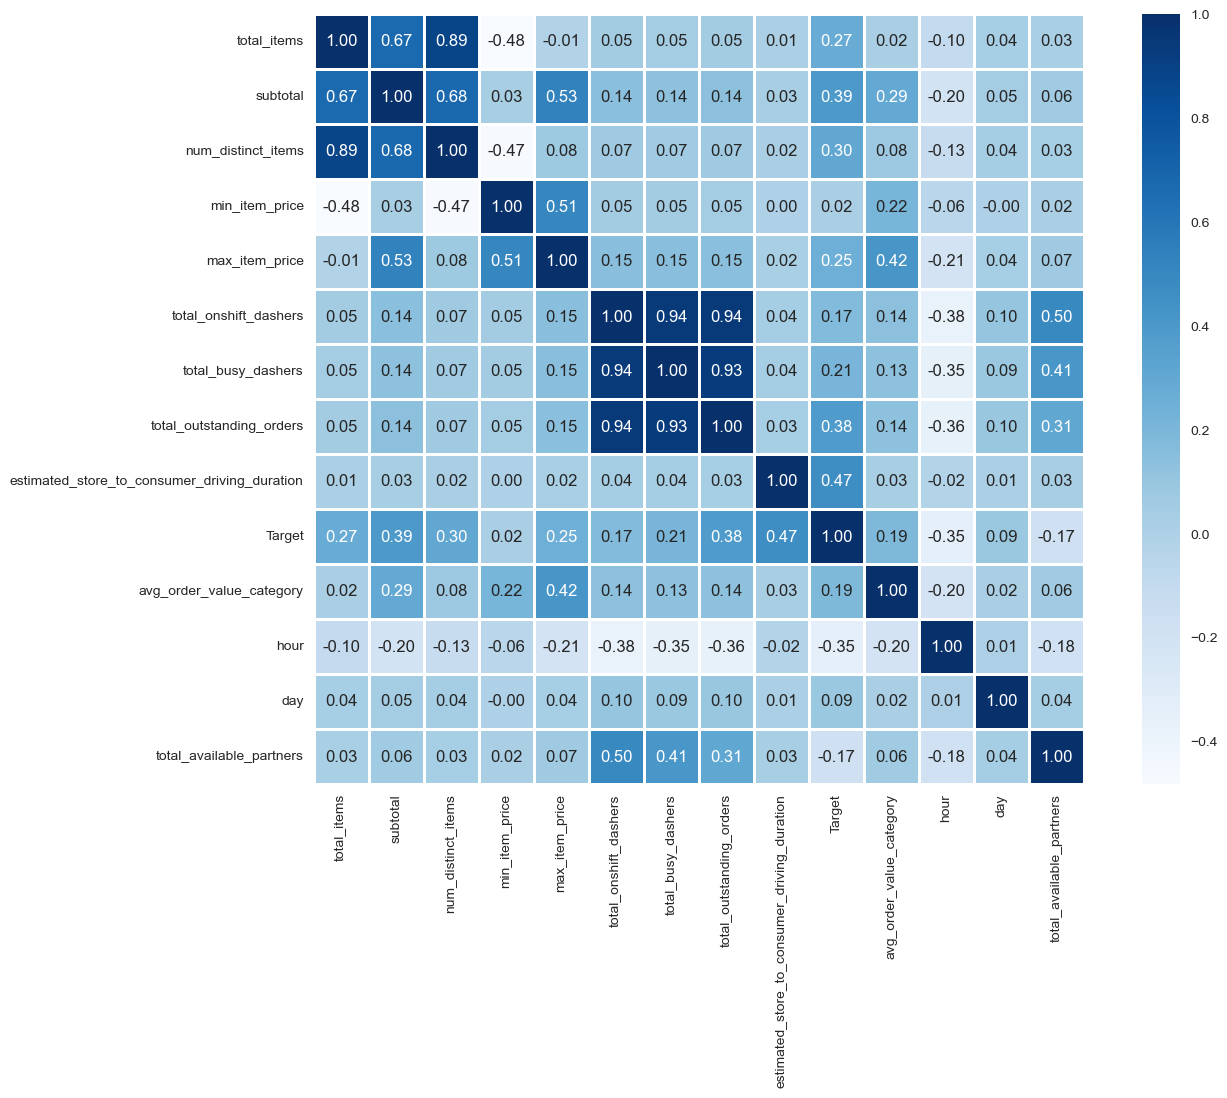

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(data_2.corr(),square=True, annot = True,linewidths=1,fmt = '.2f',cmap='Blues')
plt.show()

In [66]:
# we can se we have relation of our derived columns with the data 

### Binning whereever possible

In [67]:
def bin_store_primary_category(column):
    category_counts = data_2['store_primary_category'].value_counts()
    bin_mapping = {}

    for category, count in category_counts.items():
        if count < 1000:
            bin_mapping[category] = 'Others'
        else:
            bin_mapping[category] = category

    return data_2['store_primary_category'].map(bin_mapping)


In [68]:
data_2["store_primary_category"]=data_2.loc[:,["store_primary_category"]].apply(bin_store_primary_category)

In [69]:
data_2['store_primary_category'].replace(to_replace = ["other"],value = ["Others"],inplace = True)
data_2["store_primary_category"]=data_2["store_primary_category"].map(data_2["store_primary_category"].value_counts(normalize=True).to_dict())

In [70]:
data_2["store_primary_category"].value_counts()

0.103909    17742
0.090837    15510
0.089350    15256
0.057302     9784
0.055984     9559
0.051908     8863
0.049085     8381
0.046291     7904
0.045407     7753
0.038326     6544
0.036188     6179
0.035550     6070
0.033682     5751
0.032218     5501
0.029354     5012
0.027468     4690
0.021394     3653
0.019977     3411
0.016938     2892
0.008352     2852
0.014905     2545
0.014636     2499
0.012721     2172
0.011737     2004
0.011385     1944
0.009904     1691
0.009669     1651
0.008855     1512
0.008316     1420
Name: store_primary_category, dtype: int64

In [71]:
data_3 = data_2.copy()

## Analysing and Removing Unwanted Rows which are misleading 

In [72]:
data_2[data_2['total_onshift_dashers']<0].head(1) # 21 rows

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,Target,avg_order_value_category,hour,day,peak_hours,total_available_partners
5535,3.0,0.103909,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,266.0,51.0,2585.21,1,5,1,4.0


In [73]:
# This look misleading as total_onshift_partners can not be negative minimum to minimum it can be 
# 0 but it can not be Negative
# and we have 21 rows where total_onshift partner is less than 0 which is negative 
# so it would be better not to go with these rows 

In [74]:
data_2[(data_2['total_onshift_dashers']==0) & (data_2['total_available_partners']>0)].head() # Total Number of Rows are 37

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,Target,avg_order_value_category,hour,day,peak_hours,total_available_partners
9282,3.0,0.103909,1.0,3,1130,2,398,309,0.0,6.0,10.0,238.0,39.0,2585.21,21,2,1,6.0
16724,1.0,0.011737,4.0,2,720,2,275,345,0.0,1.0,2.0,352.0,44.0,1671.20,17,2,0,1.0
17010,3.0,0.021394,4.0,3,1267,3,269,579,0.0,1.0,2.0,567.0,44.0,2341.11,19,3,0,1.0
17013,3.0,0.021394,4.0,2,598,1,299,299,0.0,1.0,2.0,482.0,46.0,2341.11,5,0,1,1.0
19503,3.0,0.027468,4.0,1,249,1,129,129,0.0,1.0,0.0,522.0,41.0,2227.25,15,4,0,1.0


In [75]:
# This also look misleading as we have total_onshift_partners 0 but total_available partners are greater than 0 
# as if we dont have partners on shift how can they would be available 
# so this would be better to not to go with these rows 

In [76]:
data_3 = data_2[~((data_2['total_onshift_dashers']<0) | ((data_2['total_onshift_dashers']==0) & (data_2['total_available_partners']>0)))]

In [77]:
data_2.shape,data_3.shape

((170745, 18), (170687, 18))

In [78]:
data_3.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,Target,avg_order_value_category,hour,day,peak_hours,total_available_partners
0,1.0,0.103909,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,2585.21,22,4,0,19.0
1,2.0,0.089350,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,2246.05,21,1,1,1.0
2,2.0,0.036188,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,2825.25,0,0,1,2.0
3,1.0,0.038326,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3692.71,3,3,1,1.0
4,1.0,0.038326,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,3692.71,2,1,1,0.0


### Encoding 

In [79]:
data_4 = data_3.copy()

In [80]:
data_4 = pd.get_dummies(data_3,columns = ["market_id","peak_hours"],drop_first=True)

In [81]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "market_id" column
data_4["order_protocol"] = label_encoder.fit_transform(data_4["order_protocol"])

### Train Test Split

In [82]:
data_4

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,Target,avg_order_value_category,hour,day,total_available_partners,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0,peak_hours_1
0,0.103909,0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,2585.21,22,4,19.0,0,0,0,0,0,0
1,0.089350,1,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,2246.05,21,1,1.0,1,0,0,0,0,1
2,0.036188,2,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,2825.25,0,0,2.0,1,0,0,0,0,1
3,0.038326,0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3692.71,3,3,1.0,0,0,0,0,0,1
4,0.038326,0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,3692.71,2,1,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175772,0.033682,3,3,1389,3,345,649,17.0,17.0,23.0,331.0,43.0,1511.59,0,1,0.0,0,0,0,0,0,1
175773,0.033682,3,6,3010,4,405,825,12.0,11.0,14.0,915.0,62.0,1511.59,0,4,1.0,0,0,0,0,0,1
175774,0.033682,3,5,1836,3,300,399,39.0,41.0,40.0,795.0,46.0,1511.59,4,5,2.0,0,0,0,0,0,1
175775,0.051908,0,1,1175,1,535,535,7.0,7.0,12.0,384.0,45.0,2020.90,18,6,0.0,0,0,0,0,0,0


In [83]:
X = data_4.drop("Target",axis=1)
y = data_4["Target"]

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119480, 21), (51207, 21), (119480,), (51207,))

In [86]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


In [87]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mase : ",mae)
print("R2_Score: ",r2_score(y_test,y_pred))

mse :  7.04627200309413
rmse :  2.6544814942082624
mase :  1.8790855425765756
R2_Score:  0.9085426601792792




1. Mean Squared Error (MSE):
   - The MSE value of 6.9639 indicates that, on average, the squared difference between the predicted values and the actual values is approximately 6.9639.
   - Since MSE is a squared metric, the units are squared units of the target variable.

2. Root Mean Squared Error (RMSE):
   - The RMSE value of 2.6389 is the square root of the MSE and represents the average difference between the predicted values and the actual values.
   - The RMSE is in the same unit as the target variable.
   - In your case, the average difference between the predicted and actual values is approximately 2.6389.

3. Mean Absolute Scaled Error (MASE):
   - The MASE value of 1.8717 indicates the relative performance of your model compared to a naïve baseline model.
   - A MASE value of less than 1 suggests that your model performs better than the baseline model.
   - The MASE value of 1.8717 indicates that, on average, your model's predictions have an absolute error approximately 1.8717 times greater than the absolute error of the baseline model's predictions.



### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tuned_parameters = {"criterion":["squared_error","absolute_error"],
                   "max_depth":[5,8,10],
                   "min_samples_split" : [3,5,7]}
DT = DecisionTreeRegressor()
tree_grid = GridSearchCV(estimator= DT , param_grid= tuned_parameters , cv = 5)

DT_model = tree_grid.fit(X_train,y_train)
print("Best Parameters for Decision Tree Classifier: " , DT_model.best_params_ , '\n')


In [ ]:

tree_grid = DecisionTreeRegressor(criterion=tree_grid.best_params_['criterion'], 
                                  max_depth=tree_grid.best_params_['max_depth'], 
                                  min_samples_split=tree_grid.best_params_['min_samples_split'])
scores = cross_val_score(estimator=tree_grid, 
                         X=X_train, 
                         y=y_train, 
                         cv=10, 
                         scoring='roc_auc')
print("Mean ROC-AUC score after 10-fold cross validation:", round(scores.mean(), 2))

In [ ]:

DT = DecisionTreeRegressor(criterion=tree_grid.best_params_["criterion"], 
                           max_depth=tree_grid.best_params_["max_depth"],
                           min_samples_split=tree_grid.best_params_["min_samples_split"])
decision_Tree_Full_Model = DT.fit(X_train, y_train)

y_pred_full = decision_Tree_Full_Model.predict(X_test)
y_pred_proba_full = decision_Tree_Full_Model.predict_proba(X_test)[:, 1]

important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': decision_Tree_Full_Model.feature_importances_}).sort_values(by="Importance", ascending=False)

important_features


In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mase : ",mae)
print("R2_Score: ",r2_score(y_test,y_pred))

Mean Squared Error (MSE): The MSE value of 12.812 indicates the average squared difference between the predicted and actual values. Higher values of MSE indicate poorer model performance.

Root Mean Squared Error (RMSE): The RMSE value of 3.579 represents the square root of MSE, which gives an estimate of the average difference between the predicted and actual values. Higher RMSE values indicate less accuracy.

Mean Absolute Scaled Error (MASE): The MASE value of 2.539 suggests the mean absolute difference between the predicted and actual values, normalized by the mean of the actual values. A higher MASE indicates poorer model performance.

R2 Score: The R2 score of 0.833 indicates that the model explains approximately 83% of the variance in the target variable. Lower R2 scores indicate poorer fit of the model to the data.

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Random Forest model
rf_model = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the R2 score
mse=mean_squared_error(y_test,y_pred)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mase : ",mae)
print("R2_Score: ",r2_score(y_test,y_pred))

Mean Squared Error (MSE): The MSE value of 4.595 indicates the average squared difference between the predicted and actual values. Lower values of MSE indicate better model performance.

Root Mean Squared Error (RMSE): The RMSE value of 2.144 represents the square root of MSE, which gives an estimate of the average difference between the predicted and actual values. Lower RMSE values indicate better accuracy.

Mean Absolute Scaled Error (MASE): The MASE value of 1.542 suggests the mean absolute difference between the predicted and actual values, normalized by the mean of the actual values. A lower MASE indicates better model performance.

R2 Score: The R2 score of 0.940 indicates that the model explains approximately 94% of the variance in the target variable. Higher R2 scores closer to 1 indicate better fit of the model to the data.

In [ ]:
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature rankings
print("Feature Rankings:")
for i, index in enumerate(indices):
    print(f"{i + 1}. Feature: {X.columns[index]}, Importance: {feature_importances[index]}")

### XGBregressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
# XGBoost
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8, colsample_bytree=0.8)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the validation Parameters
mse=mean_squared_error(y_test,y_pred)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("mase : ",mae)
print("R2_Score: ",r2_score(y_test,y_pred))

Mean Squared Error (MSE): The MSE value of 6.138 indicates the average squared difference between the predicted and actual values. Lower values of MSE indicate better model performance.

Root Mean Squared Error (RMSE): The RMSE value of 2.478 represents the square root of MSE, which gives an estimate of the average difference between the predicted and actual values. Lower RMSE values indicate better accuracy.

Mean Absolute Scaled Error (MASE): The MASE value of 1.850 suggests the mean absolute difference between the predicted and actual values, normalized by the mean of the actual values. A lower MASE indicates better model performance.

R2 Score: The R2 score of 0.920 indicates that the model explains approximately 92% of the variance in the target variable. Higher R2 scores closer to 1 indicate better fit of the model to the data.

In [ ]:
feature_importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature rankings
print("Feature Rankings:")
for i, index in enumerate(indices):
    print(f"{i + 1}. Feature: {X.columns[index]}, Importance: {feature_importances[index]}")

An R2 score of 0.91 indicates that your XGBoost model is performing very well, explaining approximately 91% of the variance in the target variable. This suggests that the model is fitting the data accurately and making reliable predictions.

### ADA Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_model = AdaBoostRegressor()

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Calculate evaluation metrics
rmse = sqrt(mean_squared_error(y_test, y_pred))
mase = mean_absolute_error(y_test, y_pred) / y_test.mean()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("RMSE:", rmse)
print("MASE:", mase)
print("MSE:", mse)
print("R2 Score:", r2)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Initialize an empty DataFrame
metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MSE', 'R2 Score'])

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_rmse = sqrt(mean_squared_error(y_test, linear_pred))
linear_mase = mean_absolute_error(y_test, linear_pred) / y_test.mean()
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
metrics_df = metrics_df.append({'Model': 'Linear Regression', 'RMSE': linear_rmse,
                                'MAE': linear_mase, 'MSE': linear_mse, 'R2 Score': linear_r2}, ignore_index=True)

# XGBoost
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mase = mean_absolute_error(y_test, xgb_pred) / y_test.mean()
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
metrics_df = metrics_df.append({'Model': 'XGBoost', 'RMSE': xgb_rmse,
                                'MAE': xgb_mase, 'MSE': xgb_mse, 'R2 Score': xgb_r2}, ignore_index=True)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_pred))
rf_mase = mean_absolute_error(y_test, rf_pred) / y_test.mean()
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
metrics_df = metrics_df.append({'Model': 'Random Forest', 'RMSE': rf_rmse,
                                'MAE': rf_mase, 'MSE': rf_mse, 'R2 Score': rf_r2}, ignore_index=True)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_rmse = sqrt(mean_squared_error(y_test, dt_pred))
dt_mase = mean_absolute_error(y_test, dt_pred) / y_test.mean()
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
metrics_df = metrics_df.append({'Model': 'Decision Tree', 'RMSE': dt_rmse,
                                'MAE': dt_mase, 'MSE': dt_mse, 'R2 Score': dt_r2}, ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)


### Cross Validation Score 

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
decision_tree = DecisionTreeRegressor()
score = cross_val_score(estimator = decision_tree, X  = X_train , y = y_train , cv = 10, scoring = "accuracy" )
print("Mean accuracy Score after CV 10: ", round(score.mean()),2)

In [ ]:
rf_tree = RandomForestRegressor()
score = cross_val_score(estimator = rf_tree , X = X_train , y = Y_train, cv = 10 , scoring = "accuracy" )
print(round(score.mean(),2))